In [ ]:
import hnn_core
from hnn_core import calcium_model, read_params, simulate_dipole, average_dipoles
from hnn_core.viz import plot_dipole
import matplotlib.pyplot as plt
from copy import deepcopy
import pandas as pd
import pickle
import numpy as np

In [3]:
#fparams = "param_files/default.param"
fparams = "param_files/TEP_from_def_Liz_2newInputs_optimized_TMS100.param"
params = read_params(fparams)
# print(params)
# print(len(params))

In [4]:
df = pd.read_csv('GrandAvgTEPSEP_TMS100_4hnn.txt', sep = ' ')

data = [df['Time'].tolist(), df['Dipole'].tolist()]

In [5]:
read_conductance = 0
read_spikes = 0
read_synchrony = 1

In [12]:
if read_conductance:
    fname = 'nets_dpls_list_vary_TEP_ERP_80_100_120_160_200_mt'
if read_spikes:
    fname = 'nets_dpls_list_vary_TEP_ERP_1_2_3_spikes_evdist_2'
if read_synchrony:
    fname = 'nets_dpls_list_vary_TEP_ERP_1_08_06_04_sigma'

with open(f'sim_data/{fname}.pkl', 'rb') as file:
    nets, dpls_list, vary = pickle.load(file)

In [55]:
conductance = vary['conductance'][0]
spikes = vary['spikes'][0]
synchrony = vary['synchrony'][0]

mts = vary['conductance'][1]
num_spikes = vary['spikes'][1]
sigma_scalars = vary['synchrony'][1]

In [56]:
# with open('dpls_list_TEP_ERP_80_100_120.pkl', 'rb') as file:
#     dpls_list_80_100_120 = pickle.load(file)

In [57]:
# print(dpls_list)
# print(dpls_list_80_100_120)
# dpls_list_all = []
# dpls_list_all.extend(dpls_list_80_100_120)
# dpls_list_all.extend(dpls_list)
# print(dpls_list_all)

In [58]:
# with open('dpls_list_TEP_ERP_80_100_120_160_200.pkl', 'wb') as file:
#     pickle.dump(dpls_list_all, file)

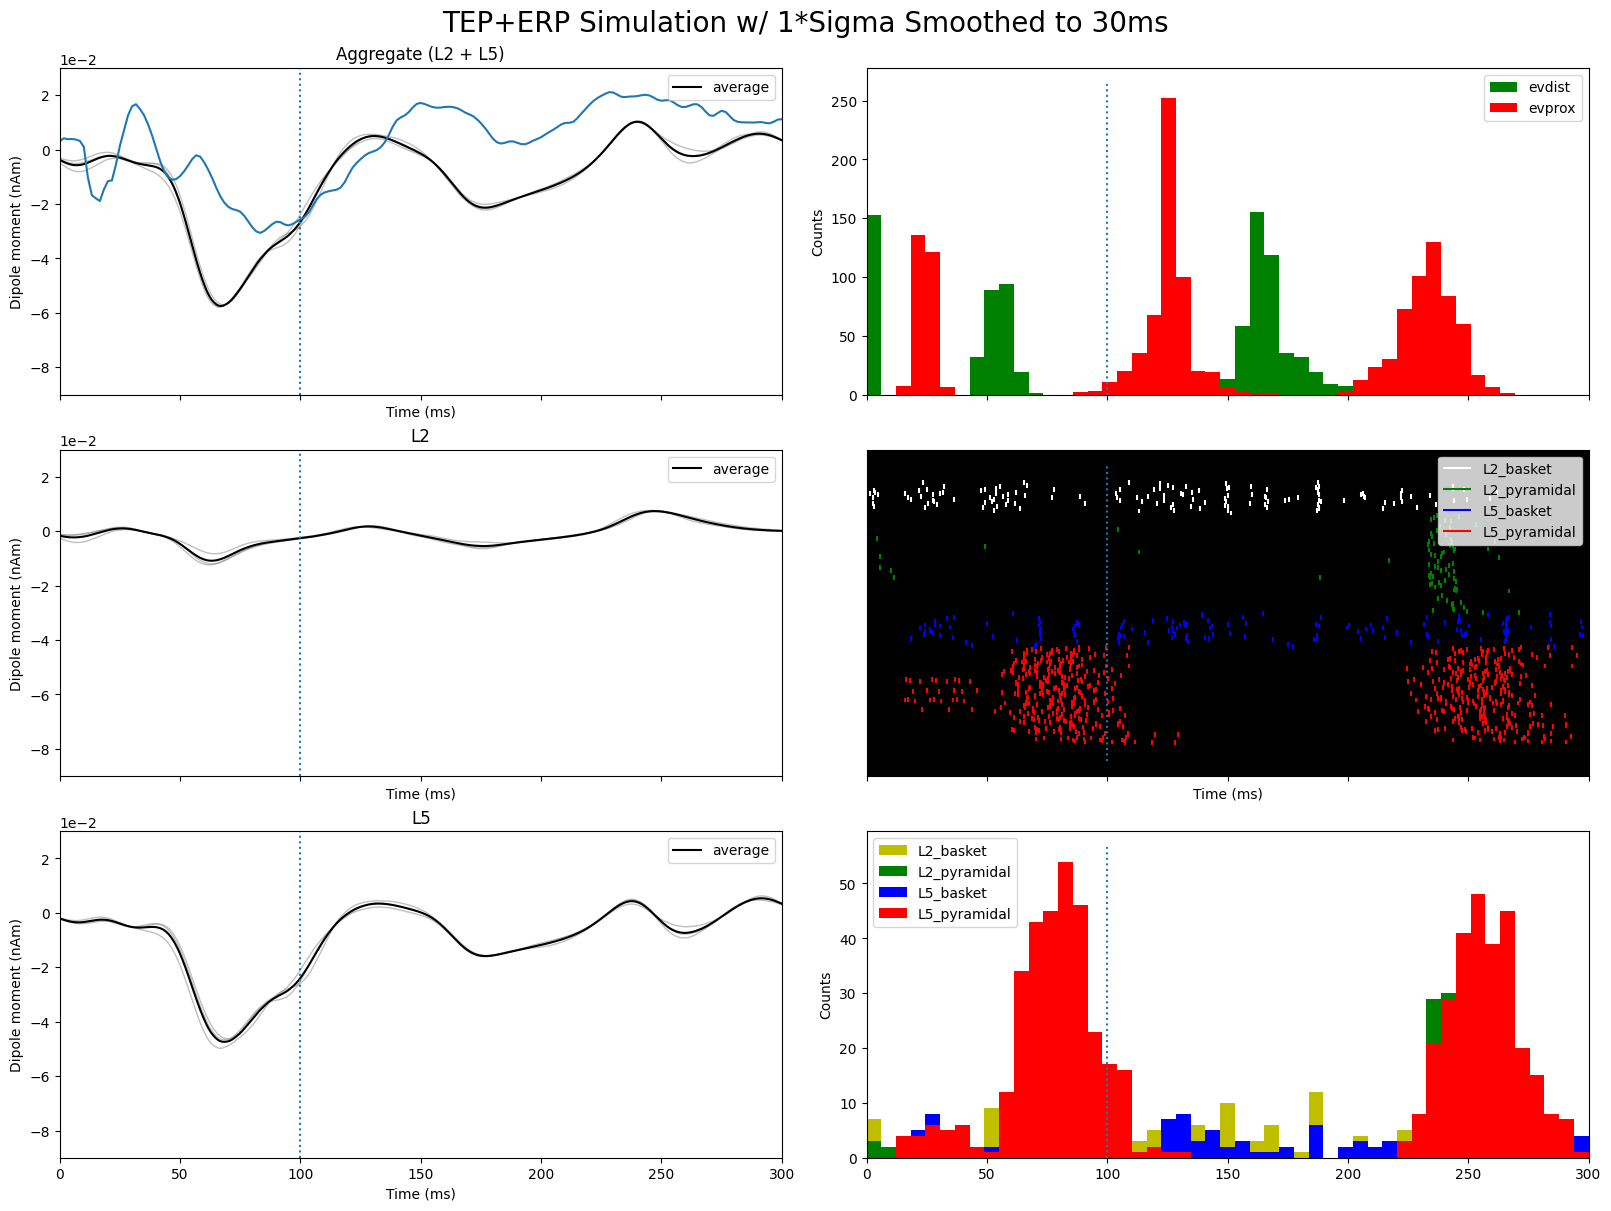

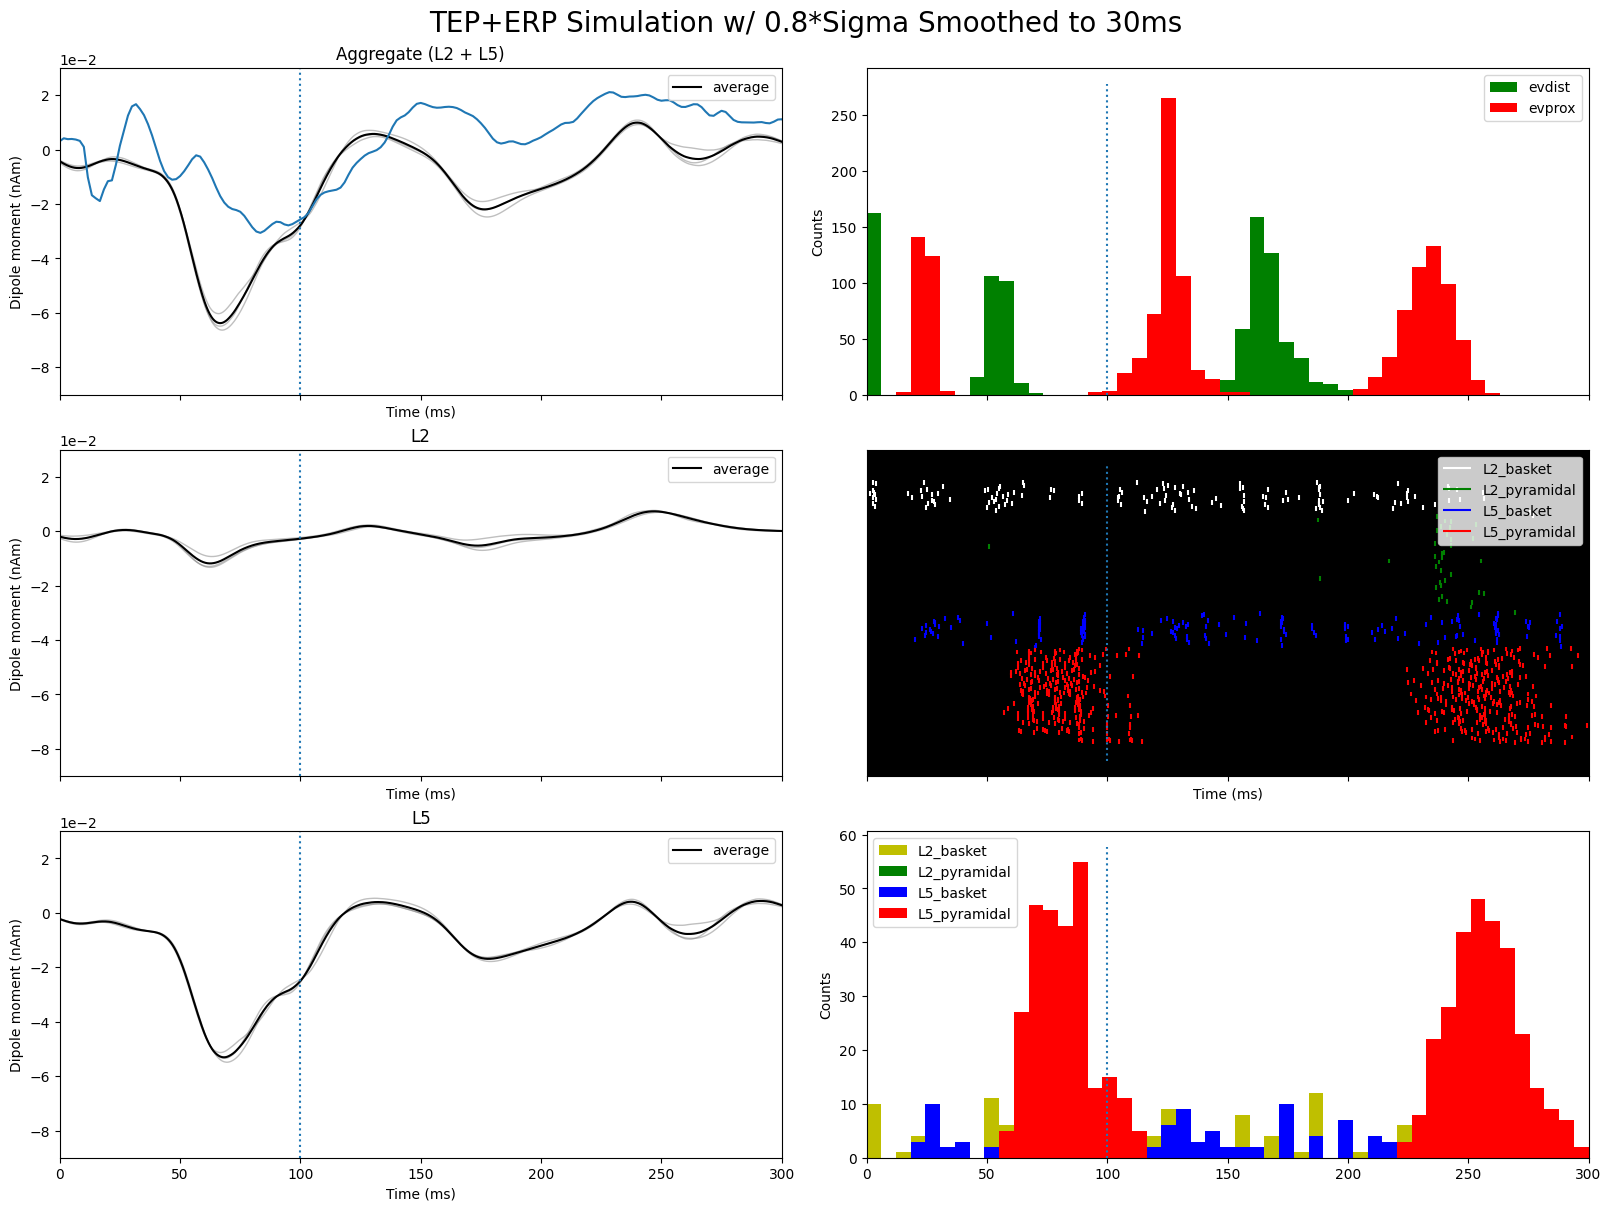

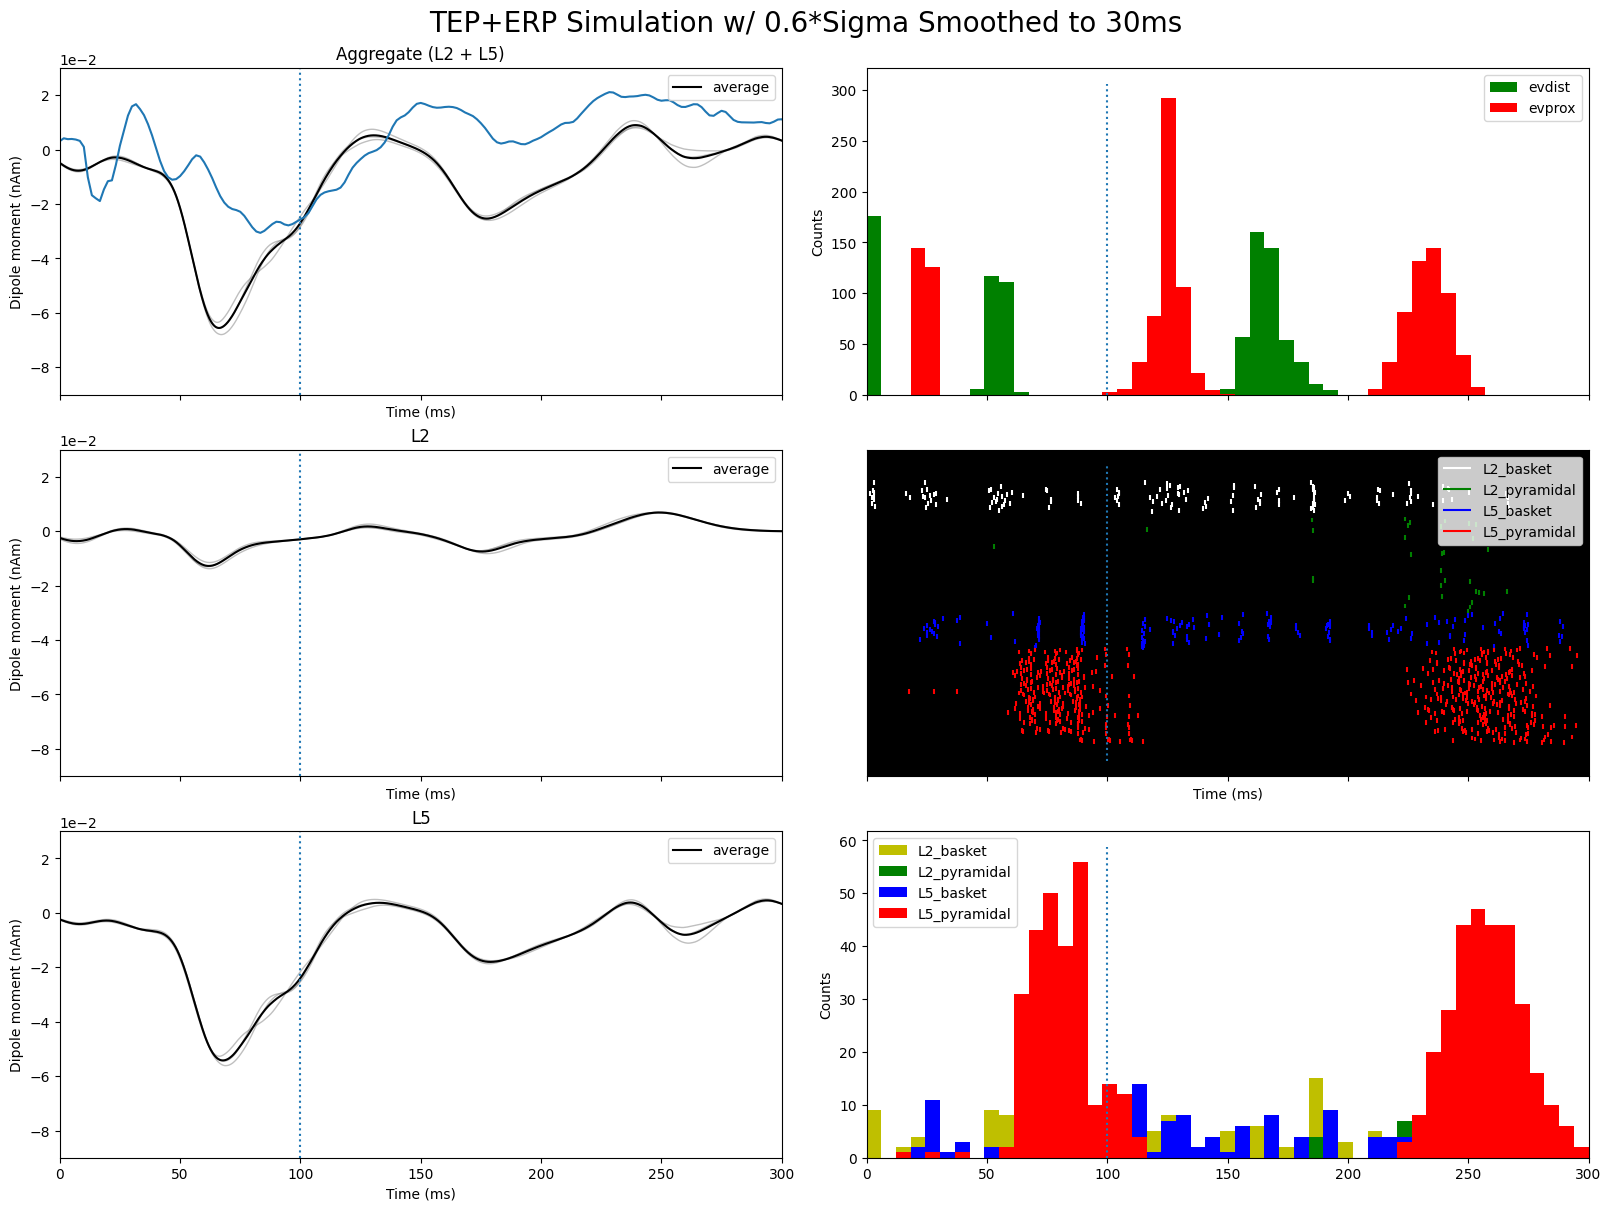

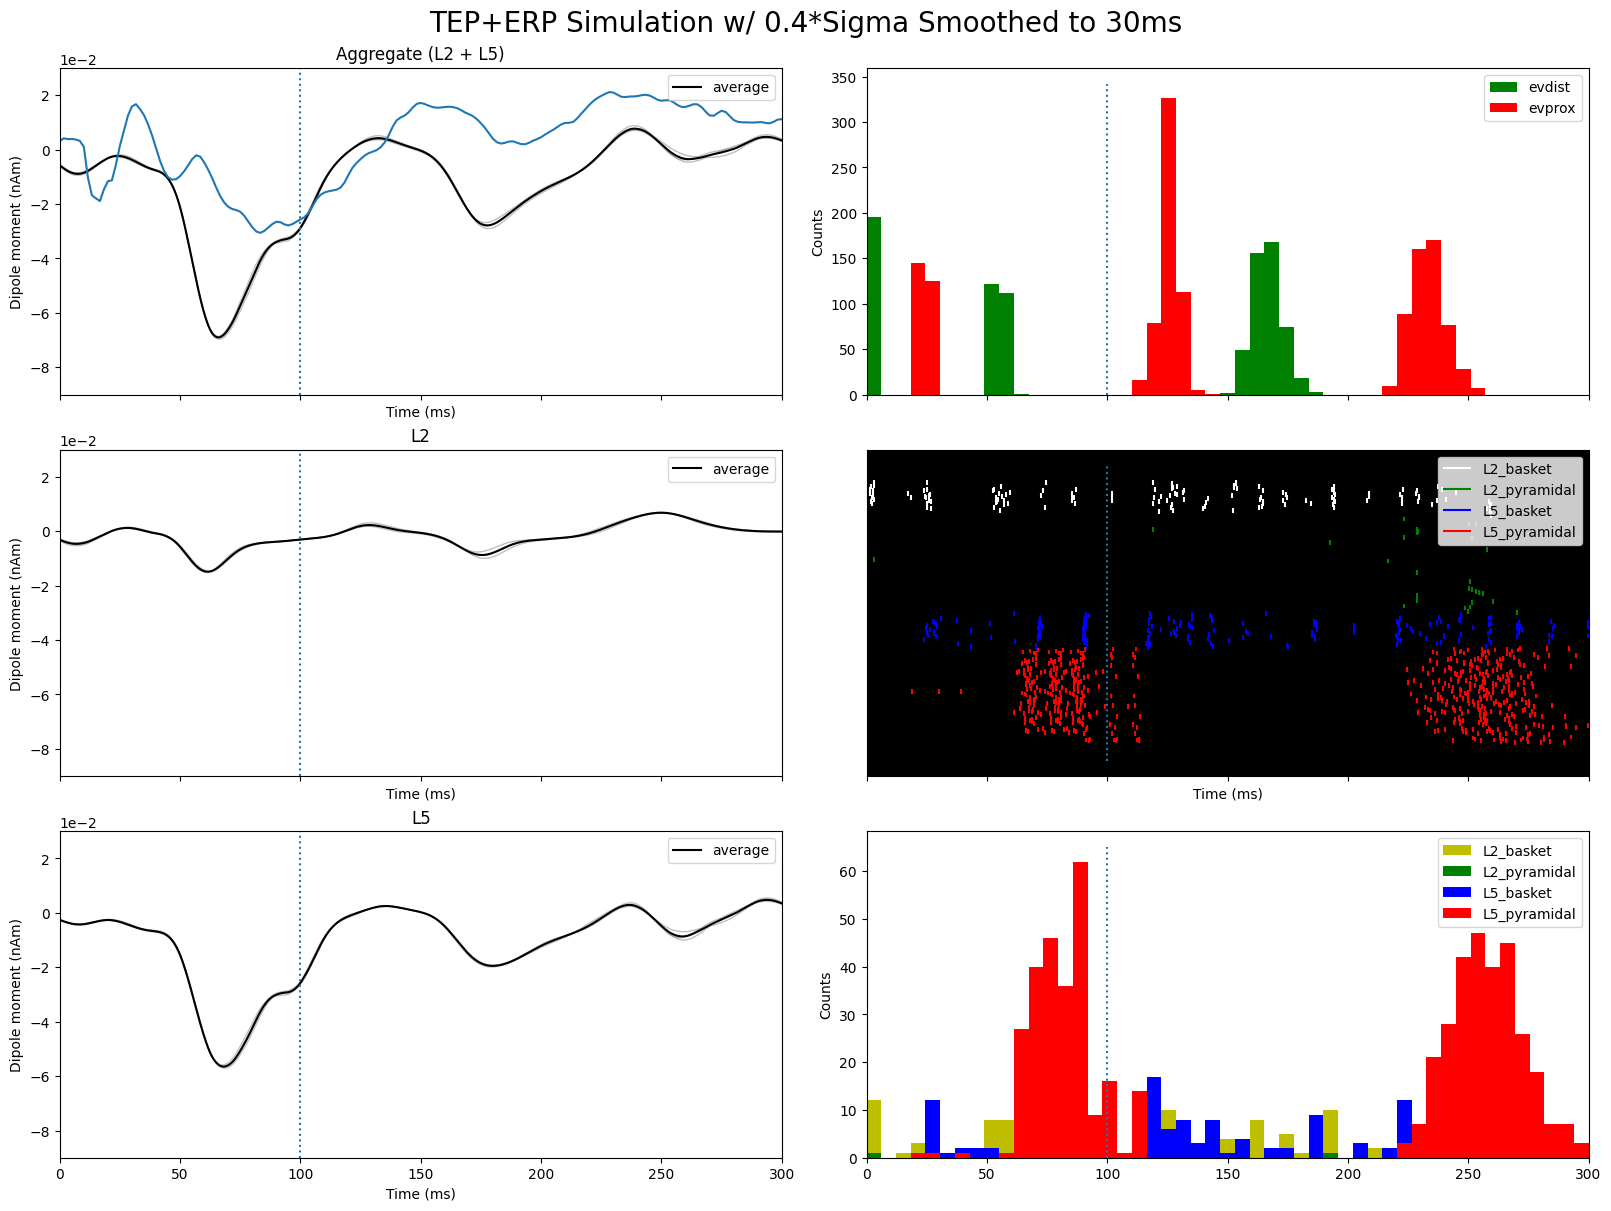

In [60]:
window_len = 30 # ms
scaling_factor = 1#3000
dpls_list_smoothed = deepcopy(dpls_list)
for dpls in dpls_list_smoothed:
    for dpl in dpls:
        dpl.smooth(window_len).scale(scaling_factor)

for i in range(len(nets)):
    dpls = dpls_list_smoothed[i]
    ylim = [-9e-2, 3e-2]
    
    fig, axes = plt.subplots(3, 2, sharex=True, figsize=(16, 12), constrained_layout=True)
    if conductance:
        fig.suptitle(f'TEP+ERP Simulation @ {mts[i]}% MT Smoothed to 30ms', fontsize=20)
    if spikes:
        if num_spikes[i] == 1:
            fig.suptitle(f'TEP+ERP Simulation w/ {num_spikes[i]} Spike Smoothed to 30ms', fontsize=20)
        else:
            fig.suptitle(f'TEP+ERP Simulation w/ {num_spikes[i]} Spikes Smoothed to 30ms', fontsize=20)
    if synchrony:
        fig.suptitle(f'TEP+ERP Simulation w/ {sigma_scalars[i]}*Sigma Smoothed to 30ms', fontsize=20)

    nets[i].cell_response.plot_spikes_hist(ax=axes[0][1], spike_types=['evprox', 'evdist'], trial_idx=0, show=False)
    axes[0][1].vlines(x=100, linestyle=':', ymin=axes[0][1].get_ylim()[0], ymax=axes[0][1].get_ylim()[1])
    dpls_copy = deepcopy(dpls)
    plot_dipole(dpls_copy, ax=axes[0][0], layer='agg', show=False, average=True)
    axes[0][0].plot(data[0], np.array(data[1])*5)
    axes[0][0].set_ylim(ylim)
    axes[0][0].vlines(x=100, linestyle=':', ymin=axes[0][0].get_ylim()[0], ymax=axes[0][0].get_ylim()[1])
    dpls_copy = deepcopy(dpls)
    plot_dipole(dpls_copy, ax=axes[1][0], layer='L2', show=False, average=True)
    axes[1][0].set_ylim(ylim)
    axes[1][0].vlines(x=100, linestyle=':', ymin=axes[1][0].get_ylim()[0], ymax=axes[1][0].get_ylim()[1])
    dpls_copy = deepcopy(dpls)
    plot_dipole(dpls_copy, ax=axes[2][0], layer='L5', show=False, average=True)
    axes[2][0].set_ylim(ylim)
    axes[2][0].vlines(x=100, linestyle=':', ymin=axes[2][0].get_ylim()[0], ymax=axes[2][0].get_ylim()[1])
    nets[i].cell_response.plot_spikes_raster(ax=axes[1][1], trial_idx=0, show=False)
    axes[1][1].vlines(x=100, linestyle=':', ymin=axes[1][1].get_ylim()[0], ymax=axes[1][1].get_ylim()[1])
    nets[i].cell_response.plot_spikes_hist(ax=axes[2][1], spike_types=['L5_pyramidal', 'L2_pyramidal', 'L5_basket', 'L2_basket', ], trial_idx=0, show=False)
    axes[2][1].vlines(x=100, linestyle=':', ymin=axes[2][1].get_ylim()[0], ymax=axes[2][1].get_ylim()[1])
    

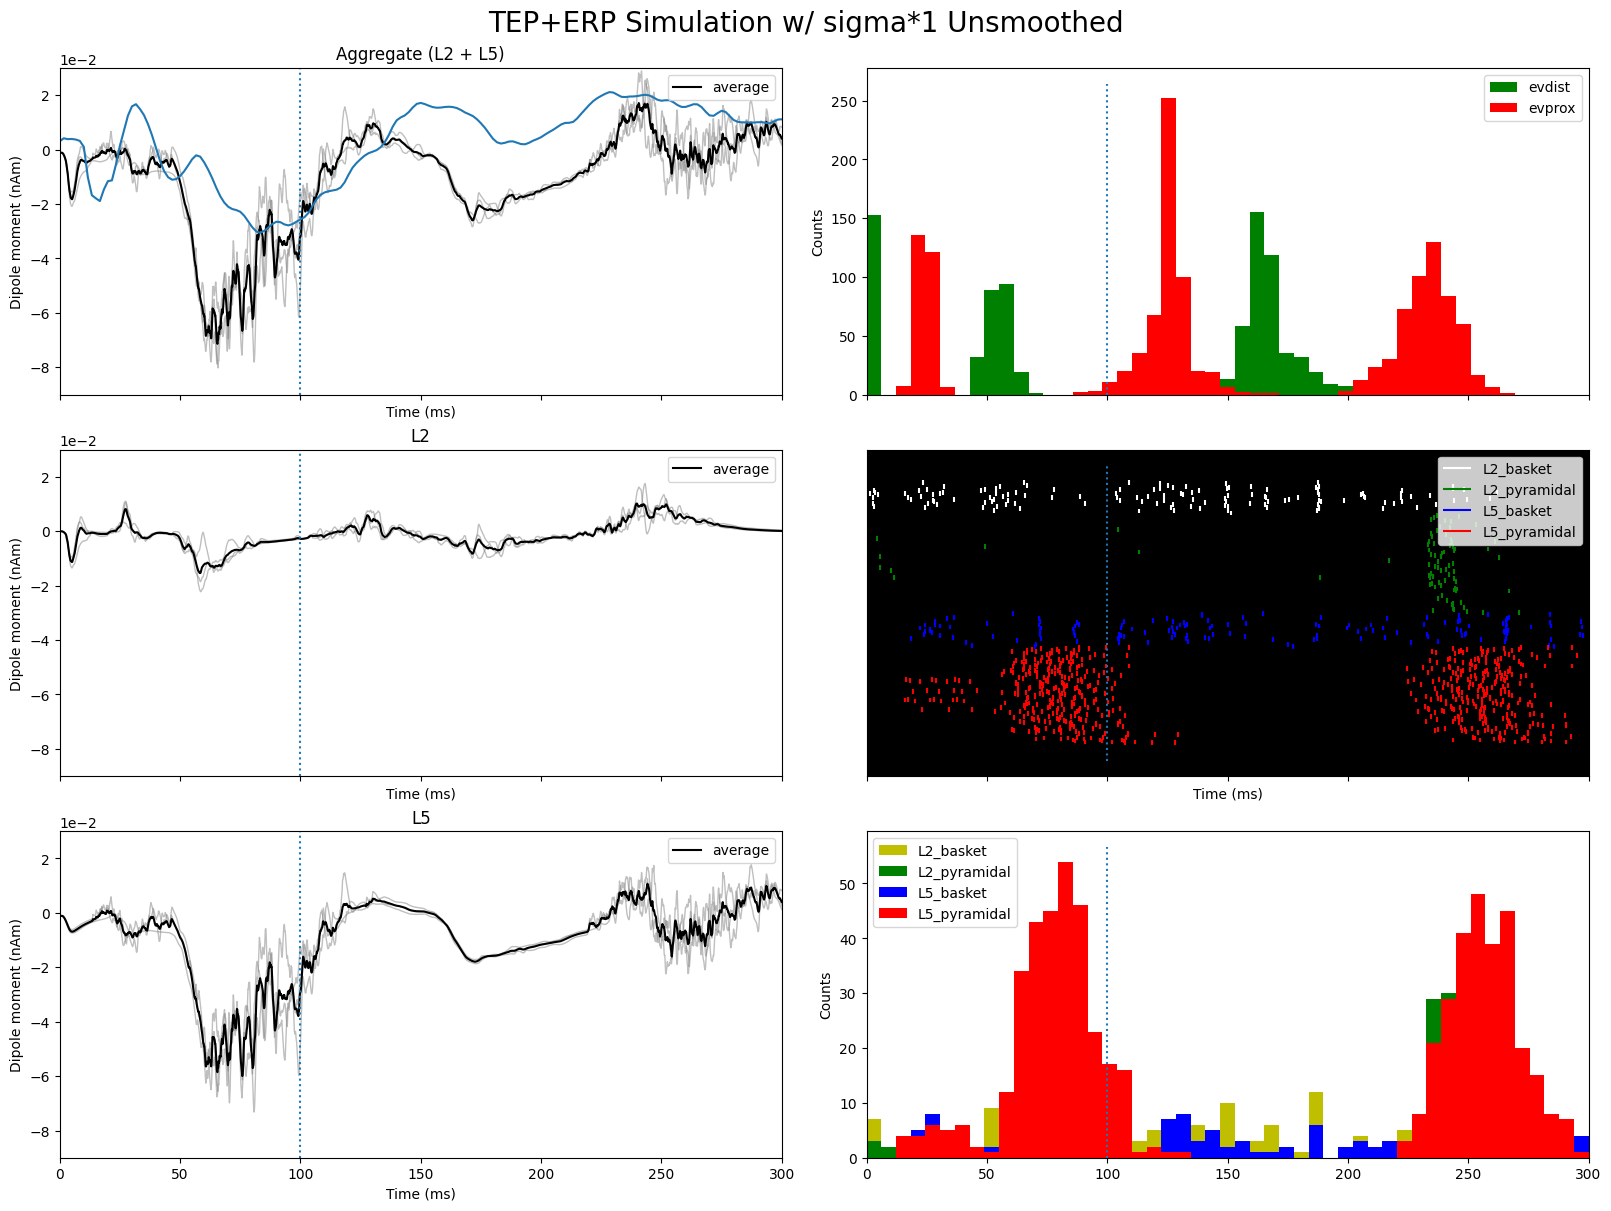

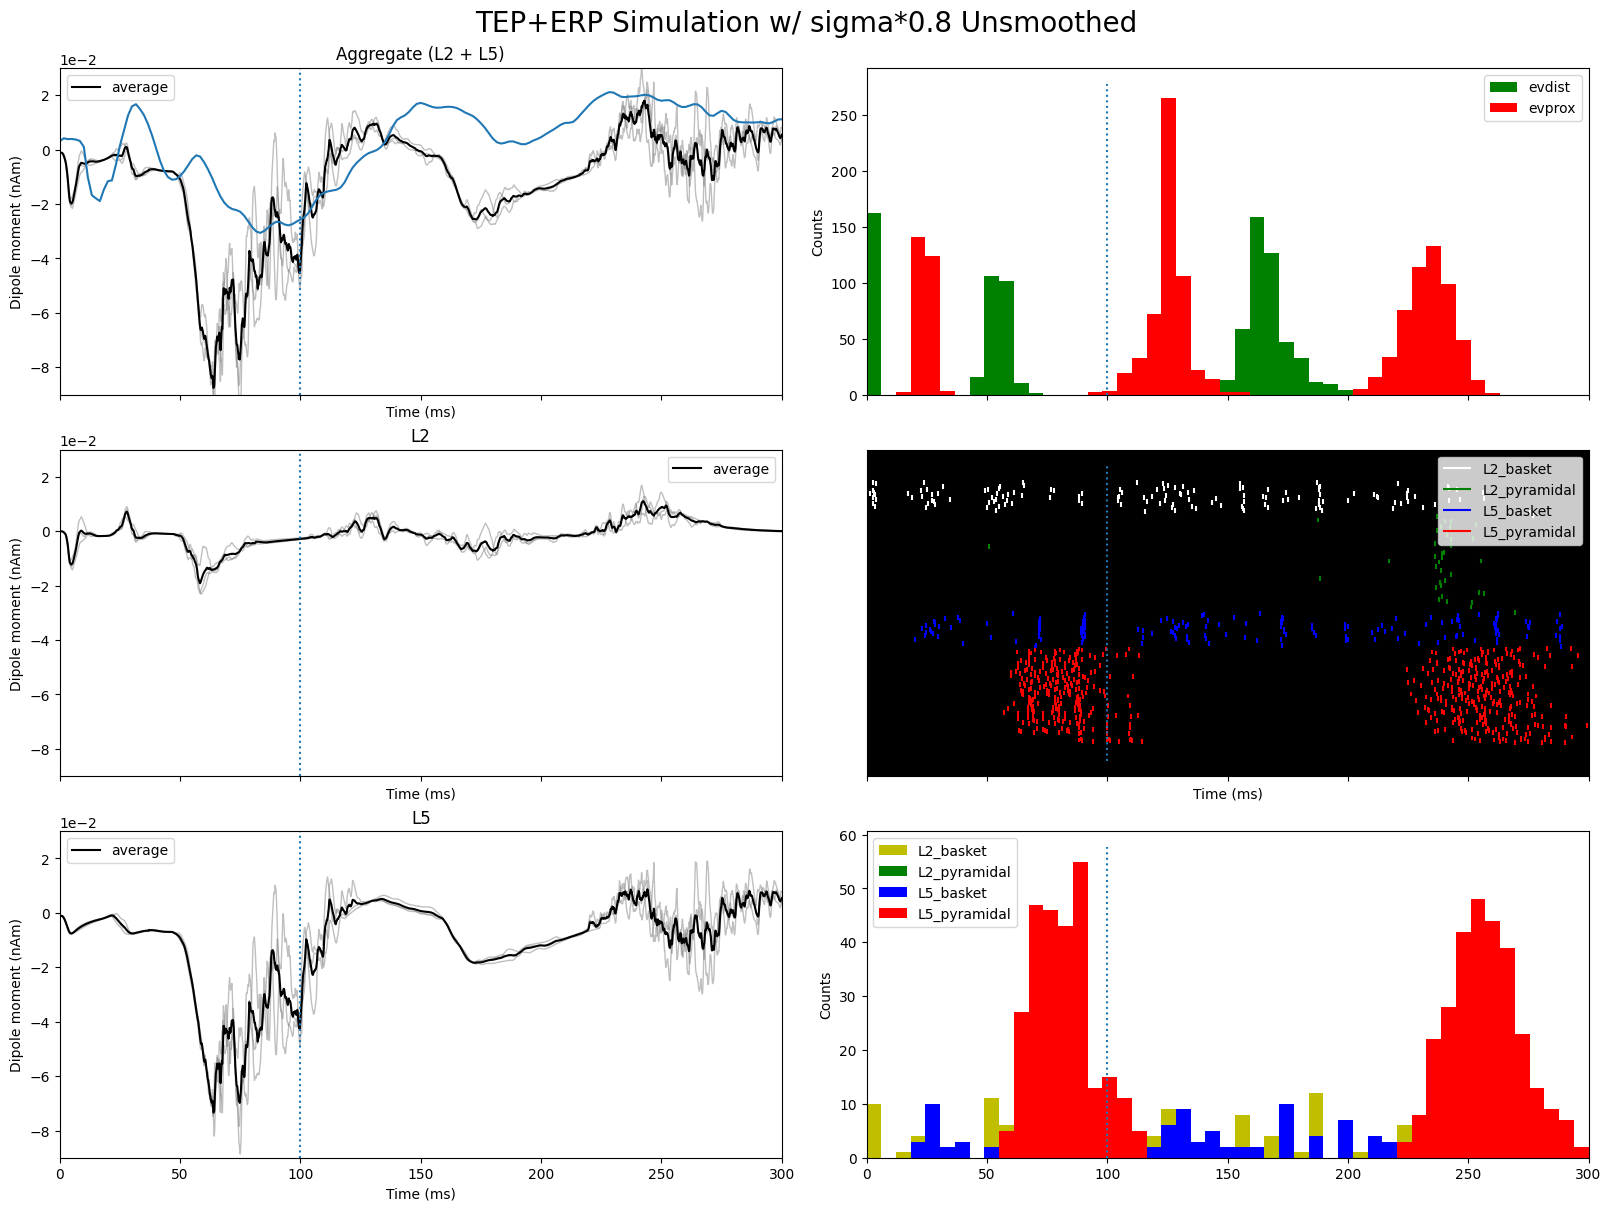

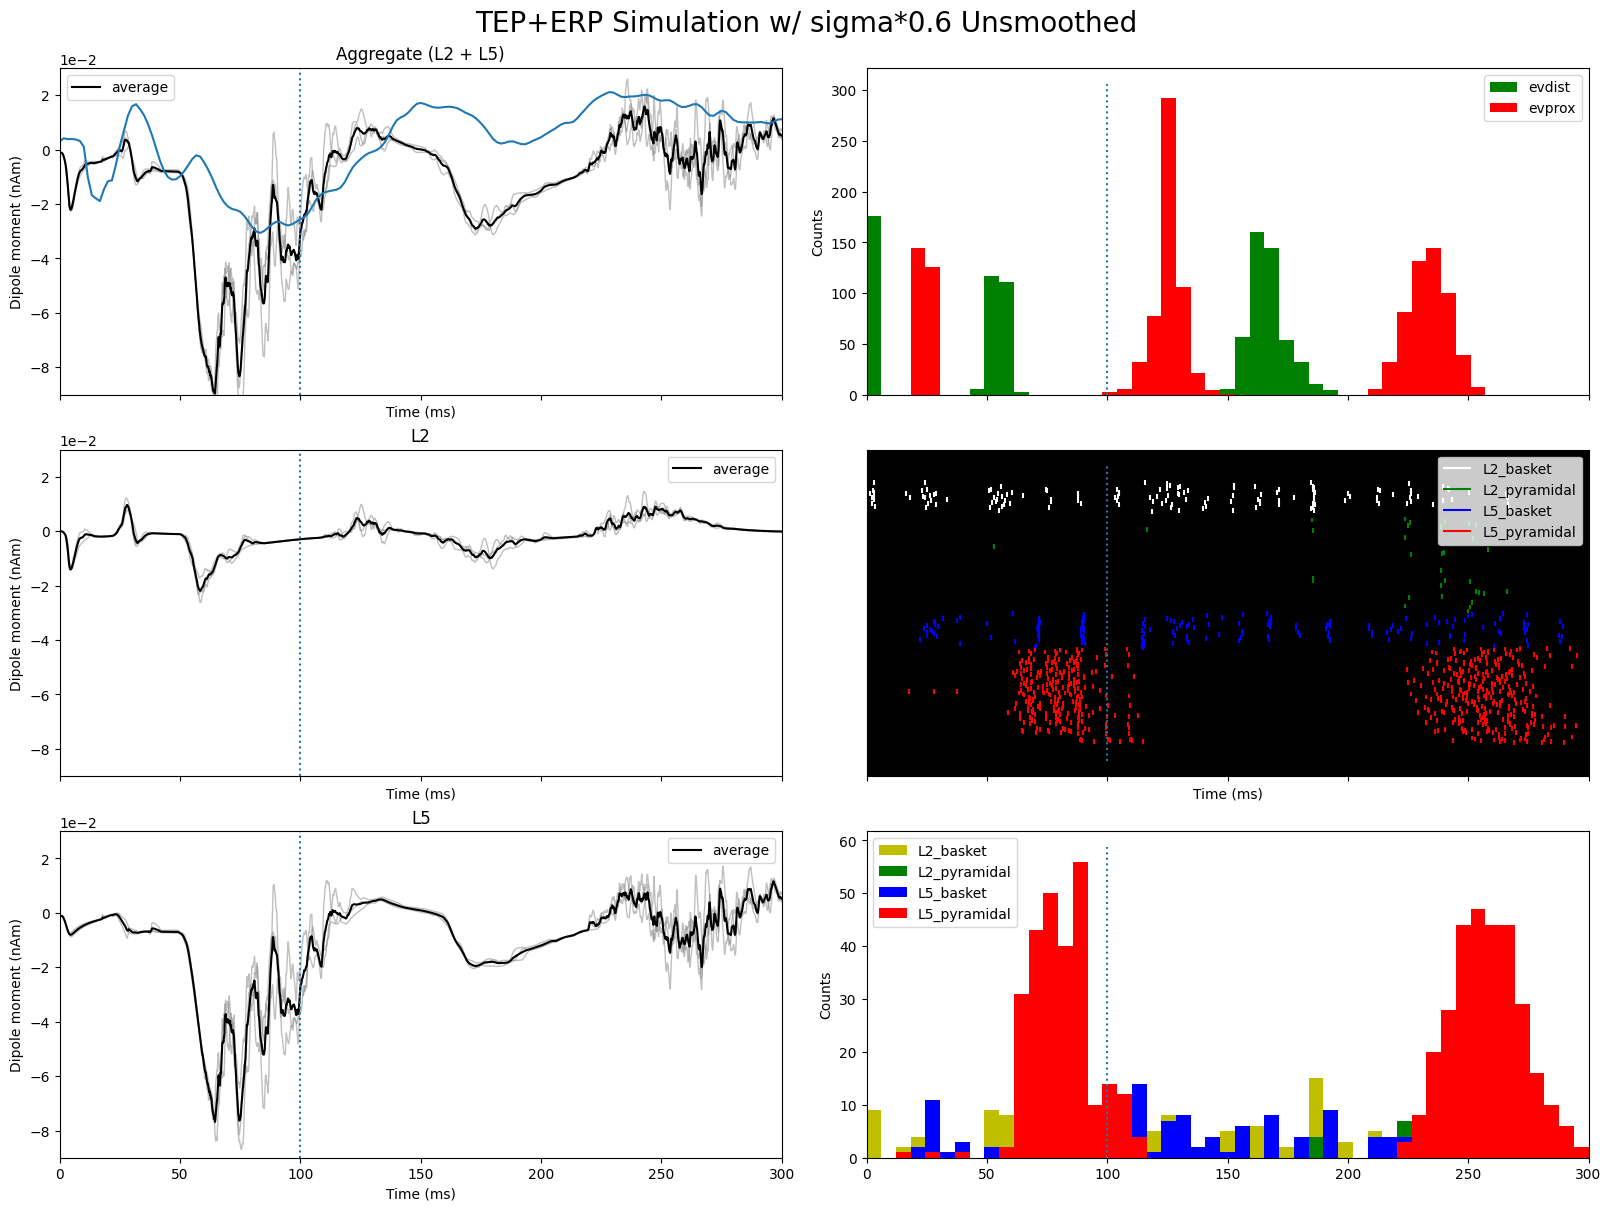

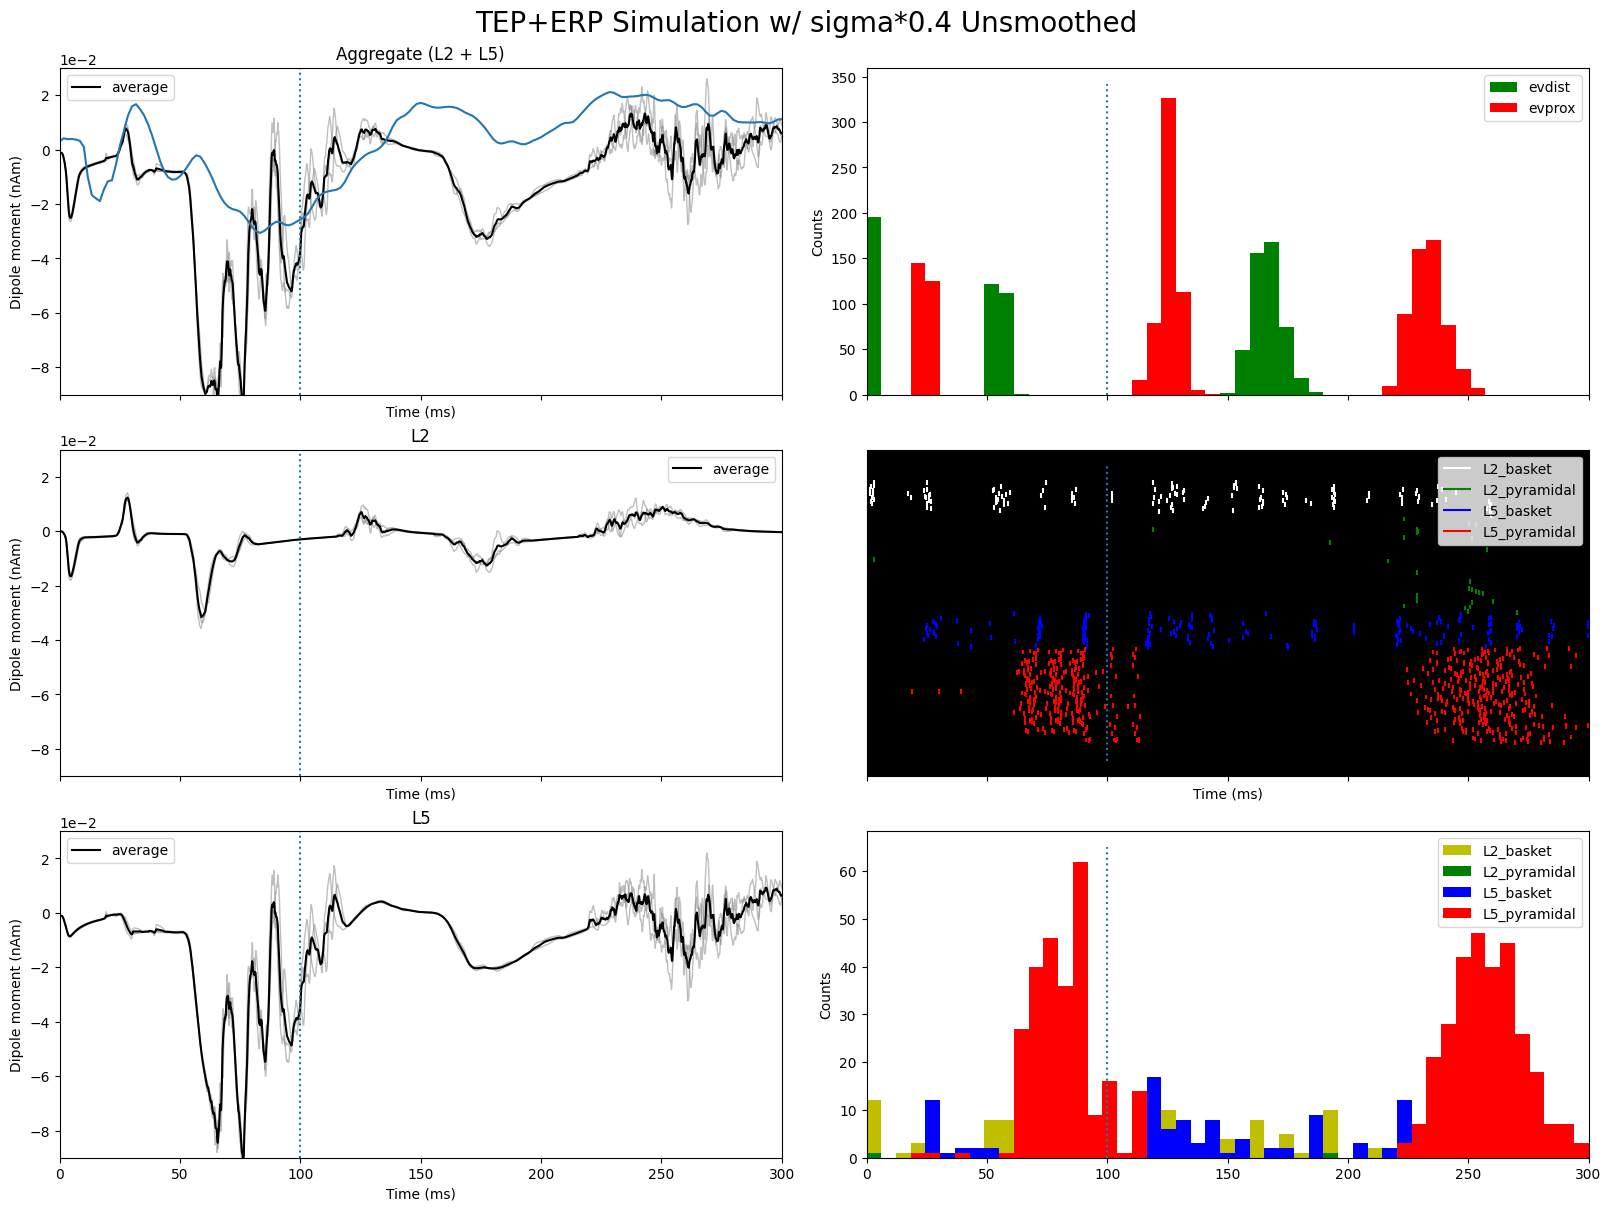

In [61]:
dpls_list_unsmoothed = deepcopy(dpls_list)

# fig, axes = plt.subplots(6, 3, sharex=True, figsize=(24, 18), constrained_layout=True)
# fig.suptitle('ERP+TEP Simulation Unsmoothed')

for i in range(len(nets)):
    dpls = dpls_list_unsmoothed[i]
    ylim = [-9e-2, 3e-2]
    
    fig, axes = plt.subplots(3, 2, sharex=True, figsize=(16, 12), constrained_layout=True)
    if conductance:
        fig.suptitle(f'TEP+ERP Simulation @ {mts[i]}% MT Unsmoothed', fontsize=20)
    if spikes:
        if num_spikes[i] == 1:
            fig.suptitle(f'TEP+ERP Simulation w/ {num_spikes[i]} Spike Unsmoothed', fontsize=20)
        else:
            fig.suptitle(f'TEP+ERP Simulation w/ {num_spikes[i]} Spikes Unsmoothed', fontsize=20)
    if synchrony:
        fig.suptitle(f'TEP+ERP Simulation w/ sigma*{sigma_scalars[i]} Unsmoothed', fontsize=20)

    nets[i].cell_response.plot_spikes_hist(ax=axes[0][1], spike_types=['evprox', 'evdist'], trial_idx=0, show=False)
    axes[0][1].vlines(x=100, linestyle=':', ymin=axes[0][1].get_ylim()[0], ymax=axes[0][1].get_ylim()[1])
    dpls_copy = deepcopy(dpls)
    plot_dipole(dpls_copy, ax=axes[0][0], layer='agg', show=False, average=True)
    axes[0][0].plot(data[0], np.array(data[1])*5)
    axes[0][0].set_ylim(ylim)
    axes[0][0].vlines(x=100, linestyle=':', ymin=axes[0][0].get_ylim()[0], ymax=axes[0][0].get_ylim()[1])
    dpls_copy = deepcopy(dpls)
    plot_dipole(dpls_copy, ax=axes[1][0], layer='L2', show=False, average=True)
    axes[1][0].set_ylim(ylim)
    axes[1][0].vlines(x=100, linestyle=':', ymin=axes[1][0].get_ylim()[0], ymax=axes[1][0].get_ylim()[1])
    dpls_copy = deepcopy(dpls)
    plot_dipole(dpls_copy, ax=axes[2][0], layer='L5', show=False, average=True)
    axes[2][0].set_ylim(ylim)
    axes[2][0].vlines(x=100, linestyle=':', ymin=axes[2][0].get_ylim()[0], ymax=axes[2][0].get_ylim()[1])
    nets[i].cell_response.plot_spikes_raster(ax=axes[1][1], trial_idx=0, show=False)
    axes[1][1].vlines(x=100, linestyle=':', ymin=axes[1][1].get_ylim()[0], ymax=axes[1][1].get_ylim()[1])
    nets[i].cell_response.plot_spikes_hist(ax=axes[2][1], spike_types=['L5_pyramidal', 'L2_pyramidal', 'L5_basket', 'L2_basket', ], trial_idx=0, show=False)
    axes[2][1].vlines(x=100, linestyle=':', ymin=axes[2][1].get_ylim()[0], ymax=axes[2][1].get_ylim()[1])
    


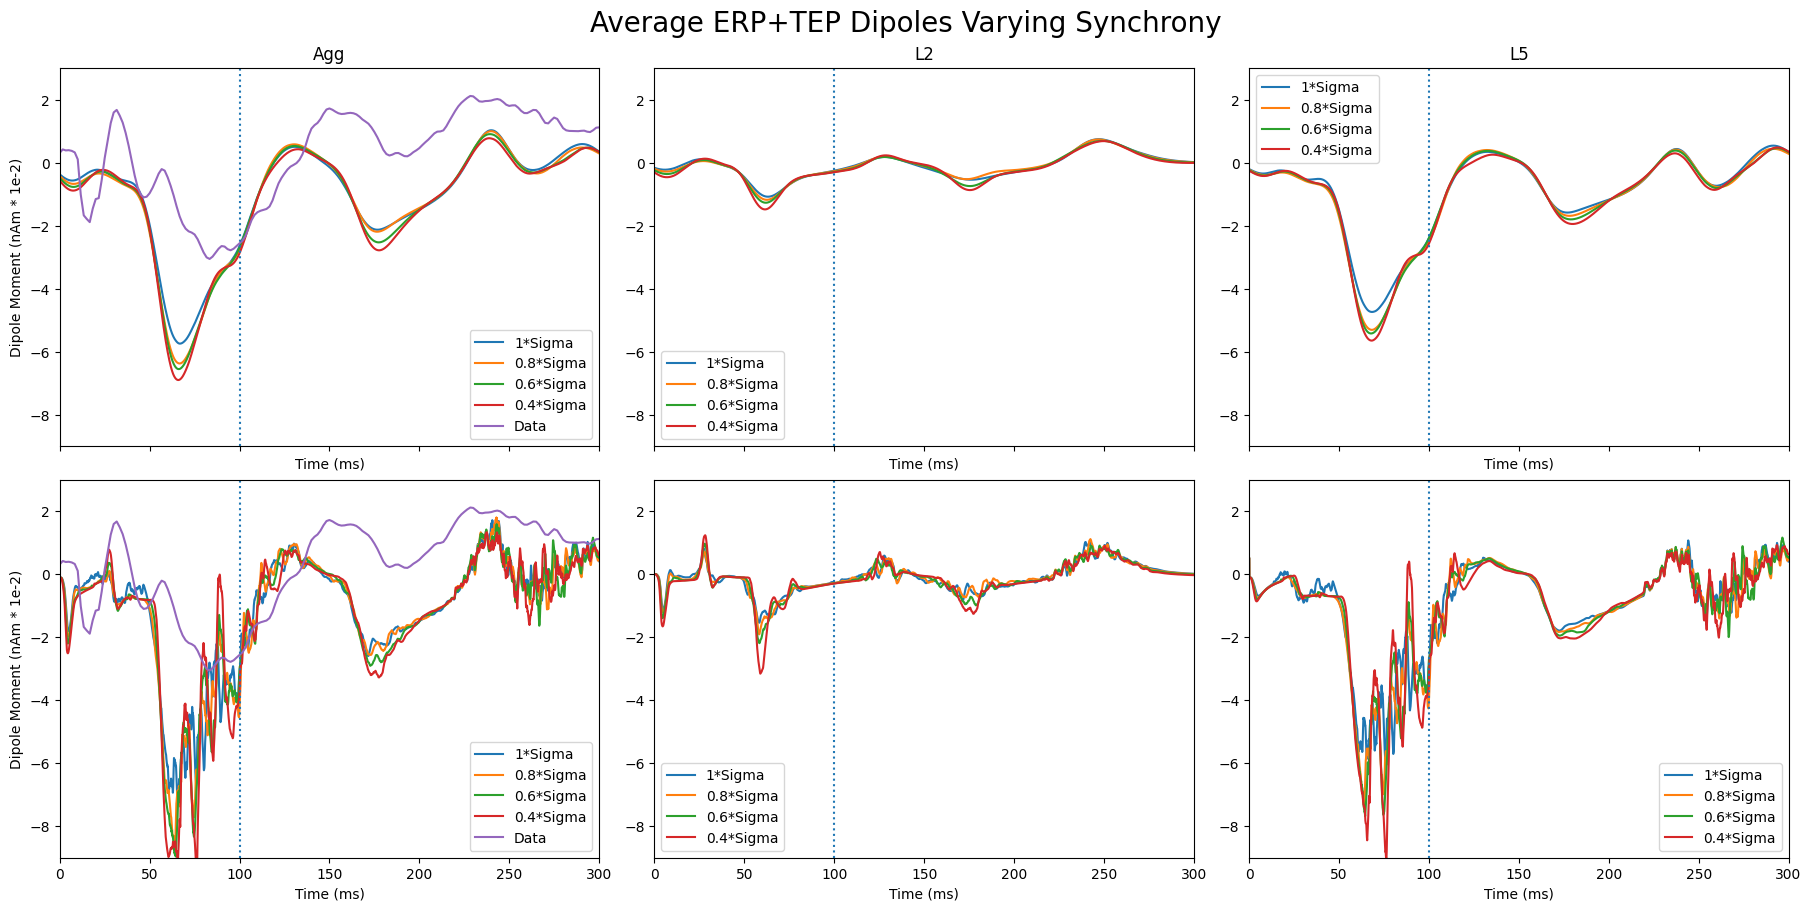

In [62]:
avg_dipoles_smoothed = [average_dipoles(dpls) for dpls in dpls_list_smoothed]
avg_dipoles_unsmoothed = [average_dipoles(dpls) for dpls in dpls_list_unsmoothed]

fig, axes = plt.subplots(2, 3, sharex=True, figsize=(18, 9), constrained_layout=True)

if conductance:
    fig.suptitle("Average ERP+TEP Dipoles Varying Conductances", fontsize=20)
    legend = [f"{mt}% MT" for mt in mts]
if spikes:
    fig.suptitle("Average ERP+TEP Dipoles Varying Spikes", fontsize=20)
    legend = [f"{num} Spike" if num==1 else f"{num} Spikes" for num in num_spikes]
if synchrony:
    fig.suptitle("Average ERP+TEP Dipoles Varying Synchrony", fontsize=20)
    legend = [f"{scalar}*Sigma" for scalar in sigma_scalars]
legend.append("Data")

for i, title in enumerate(["Agg", "L2", "L5"]):
    axes[0][i].set_title(title)
for ax in axes:
    ax[0].set_ylabel("Dipole Moment (nAm * 1e-2)")

for i, avg_dpls in enumerate([avg_dipoles_smoothed, avg_dipoles_unsmoothed]):
    for j, layer in enumerate(["agg", "L2", "L5"]):
        for dpl in avg_dpls:
            axes[i][j].plot(dpl.times, dpl.data[layer]*1e2)
        if j==0:
            axes[i][j].plot(data[0], np.array(data[1])*5e2)
            axes[i][j].set_xlim([0, params['tstop']])
            axes[i][j].legend(legend)
        else:
            axes[i][j].legend(legend[:-1])
        axes[i][j].set_xlabel("Time (ms)")
        axes[i][j].set_ylim([-9, 3])
        axes[i][j].vlines(x=100, linestyle=':', ymin=axes[i][j].get_ylim()[0], ymax=axes[i][j].get_ylim()[1])
